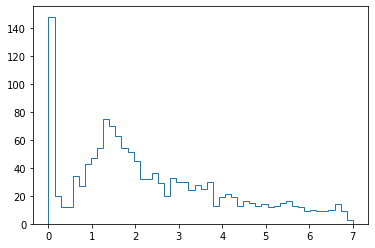

In [3]:
import matplotlib.pyplot as plt
from electron_gun import generate_electron_curve

out = generate_electron_curve("./psiK_1000.root")
plt.hist(out, range=(0, 7), bins=50, histtype='step')
plt.show()

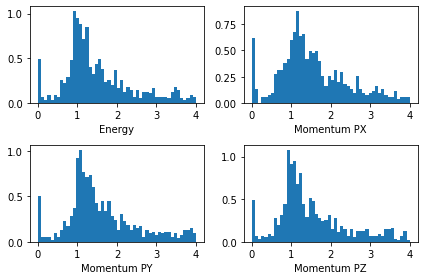

In [2]:
import matplotlib.pyplot as plt
from electron_gun import generate_electron_momentum_curve

e, px, py, pz = generate_electron_momentum_curve("./1000ev.root")
fig, axes = plt.subplots(2, 2)
axes[0, 0].hist(e, range=(0, 4), bins=50, density=True)
axes[0, 1].hist(px, range=(0, 4), bins=50, density=True)
axes[1, 0].hist(py, range=(0, 4), bins=50, density=True)
axes[1, 1].hist(pz, range=(0, 4), bins=50, density=True)
axes[0, 0].set_xlabel("Energy")
axes[0, 1].set_xlabel("Momentum PX")
axes[1, 0].set_xlabel("Momentum PY")
axes[1, 1].set_xlabel("Momentum PZ")
plt.tight_layout()
plt.show()

5073.357436648051


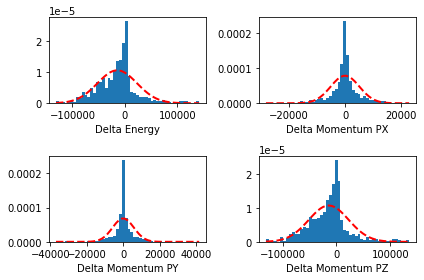

In [1]:
from electron_gun import generate_electron_momentum_delta
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

momenta = generate_electron_momentum_delta("./1000ev.root")
fig, axes = plt.subplots(2, 2)

e = [m.e for m in momenta]
n, bins, patches = axes[0, 0].hist(e, bins=50, density=True)
(mu, sigma) = norm.fit(e)
y = norm.pdf(bins, loc=mu, scale=sigma)
l = axes[0, 0].plot(bins, y, 'r--', linewidth=2)

p_x = [m.p_x for m in momenta]
n, bins, patches = axes[0, 1].hist(p_x, bins=50, density=True)
(mu, sigma) = norm.fit(p_x)
print(sigma)
y = norm.pdf(bins, loc=mu, scale=sigma)
l = axes[0, 1].plot(bins, y, 'r--', linewidth=2)

p_y = [m.p_y for m in momenta]
n, bins, patches = axes[1, 0].hist(p_y, bins=50, density=True)
(mu, sigma) = norm.fit(p_y)
y = norm.pdf(bins, loc=mu, scale=sigma)
l = axes[1, 0].plot(bins, y, 'r--', linewidth=2)

p_z = [m.p_z for m in momenta]
n, bins, patches = axes[1, 1].hist(p_z, bins=50, density=True)
(mu, sigma) = norm.fit(p_z)
y = norm.pdf(bins, loc=mu, scale=sigma)
l = axes[1, 1].plot(bins, y, 'r--', linewidth=2)
axes[0, 0].set_xlabel("Delta Energy")
axes[0, 1].set_xlabel("Delta Momentum PX")
axes[1, 0].set_xlabel("Delta Momentum PY")
axes[1, 1].set_xlabel("Delta Momentum PZ")

plt.tight_layout()
plt.show()

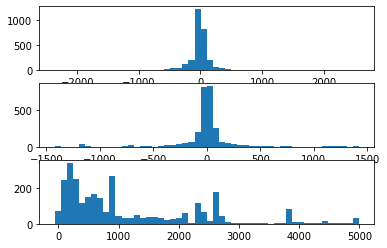

In [1]:
import matplotlib.pyplot as plt
from electron_gun import generate_ov_distribution

ovx, ovy, ovz = generate_ov_distribution("./1000ev.root")

fig, axes = plt.subplots(3, 1)
axes[0].hist(ovx, bins=50)
axes[1].hist(ovy, bins=50)
axes[2].hist(ovz, bins=50)
plt.show()